In [ ]:
!apt-get install -qq libproj-dev proj-data proj-bin libgeos-dev

Selecting previously unselected package proj-bin.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.3 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs
import sys
import numpy as np
from scipy import signal
from scipy.stats import percentileofscore, norm
import datetime as dt
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
from itertools import product
from scipy.ndimage import uniform_filter1d

In [ ]:
mems = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']

In [ ]:
for mem in mems:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/{mem}/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-long-eq_{mem}_gn_185004-187012.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/{mem}/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-long-eq_{mem}_gn_185004-187012.nc
#    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/{mem}/AERmon/od550so4/gn/v20210118/od550so4_AERmon_MIROC-ES2L_volc-long-eq_{mem}_gn_185004-187012.nc

--2024-01-09 06:53:39--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/r1i1p1f2/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 6566493 (6.3M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]   6.26M  4.84MB/s    in 1.3s    

2024-01-09 06:53:41 (4.84 MB/s) - ‘pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc’ saved [6566493/6566493]

--2024-01-09 06:53:41--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-long-eq/r1i1p1f2/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
Resolving esgf-da

In [ ]:
import xarray as xr
ds_pr_volc_long_eq  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-long-eq*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_volc_long_eq = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-long-eq*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
#ds_aod = xr.open_mfdataset('od550so4_*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble').to_netcdf('aod_Amon_MIROC-ES2L_volc-long-eq_ensmean_gn_185004-187012.nc')

In [ ]:
#!rm -rf pr_Amon_MIROC-ES2L_volc-long-eq_r*.nc tas_Amon_MIROC-ES2L_volc-long-eq_r*.nc od550*.nc

# PI control

In [ ]:
vars = ['pr', 'tas']
for var in vars:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc

--2024-01-09 06:54:16--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/pr/gn/v20190823/pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 62764652 (60M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]  59.86M  18.1MB/s    in 4.3s    

2024-01-09 06:54:21 (13.8 MB/s) - ‘pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’ saved [62764652/62764652]

--2024-01-09 06:54:21--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/pr/gn/v20190823/pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
Resolving esgf-data02.diasjp.net (esgf-

In [ ]:
!rm -rf *.1
!ls

pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r2i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r3i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r4i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r5i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r6i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r7i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r8i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r9i1p1f2_gn_185004-187012.nc
sample_data
tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc
tas_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
tas_Amon_MIROC-ES2L_volc-l

In [ ]:
!pip install cftime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.1 MB/s eta 0:00:00


In [ ]:
import cftime
ds_pr_piC = xr.open_mfdataset('pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')
ds_tas_piC = xr.open_mfdataset('tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')

In [ ]:
ds_pr_piC

<xarray.Dataset>
Dimensions:    (time: 2400, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2049-12-16T12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(2400, 64, 128), meta=np.ndarray>
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  -127835.0
    creation_date:          2019-06-28T11:17:37Z
    ...                     ...
    title:                  MIROC-ES2L output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/dabadc85-f140-4002-8cc3-996d2fb01a4d

In [ ]:
pr_monthly_climatology = ds_pr_piC.pr.groupby('time.month').mean('time')
tas_monthly_climatology = ds_tas_piC.tas.groupby('time.month').mean('time')

In [ ]:
ds_pr_anom  = (ds_pr_volc_long_eq.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_anom = ds_tas_volc_long_eq.tas.groupby('time.month') - tas_monthly_climatology

/usr/local/lib/python3.10/dist-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]
/usr/local/lib/python3.10/dist-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


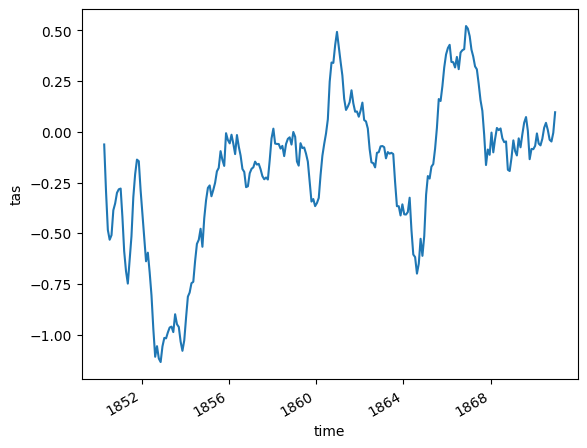

In [ ]:
ds_nino34 = ds_tas_anom.sel(lon=slice(170, 240), lat=slice(-5, 5)).mean(dim='lat').mean(dim='lon')
ds_nino34.plot()

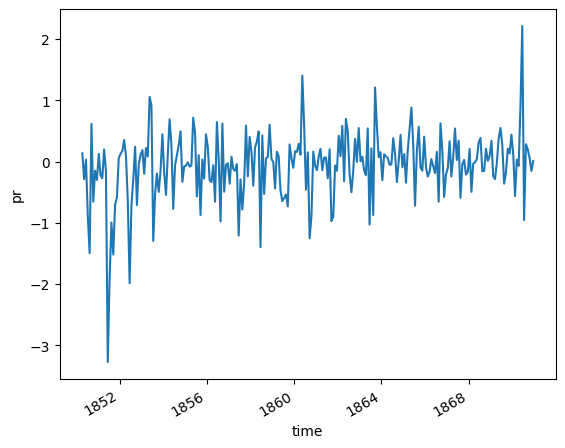

In [ ]:
ds_im = ds_pr_anom.sel(lon=slice(74.5, 86.5), lat=slice(16.5, 26.5)).mean(dim='lat').mean(dim='lon')
ds_im.plot()

In [ ]:
def iirfilter(x, N=4, cutoff=12., fs=12.):
    """
    Returns the forward-backward filtered signal using a Butterworth filter.
    """
    nyq = 0.5 * fs
    cutoff_normed = cutoff / nyq
    b, a = signal.butter(N, cutoff_normed, "low", analog=False)
    return  signal.filtfilt(b, a, x, padtype=None)

c = 3. / 4.                 # numerator of cutoff freq
cutoff_den = 12.
N = 1.                      # filter order of the Butterworth filter
fs = 12.                    # 12 samples per year
NSURR = 100
TAUMAX = 5.
CI_WD = 25.
cutoff_num = c
cut = cutoff_num / cutoff_den
nino_filt = iirfilter(ds_nino34.values, N=N, cutoff=cut, fs=fs)
ismr_filt = iirfilter(ds_im.values, N=N, cutoff=cut, fs=fs)

In [ ]:
def boxfilter(x, size=5, est="mean"):
    """Returns the box filter of array"""
    n = x.shape[0]
    if est == "mean":
        xf_pre = np.r_[x[0], [x[:i].mean() for i in range(1, size)]]
        xf_post = [np.mean(x[i-size:i]) for i in range(size, n)]
    elif est == "median":
        xf_pre = np.r_[x[0], [np.median(x[:i]) for i in range(1, size)]]
        xf_post = [np.median(x[i-size:i]) for i in range(size, n)]
    elif est == "max":
        xf_pre = np.r_[x[0], [np.max(x[:i]) for i in range(1, size)]]
        xf_post = [np.max(x[i-size:i]) for i in range(size, n)]
    xf = np.r_[xf_pre, xf_post]
    return xf

In [ ]:
nino_diff = np.diff(nino_filt, n=2)
nino_diff = np.r_[nino_diff[0], nino_diff[0], nino_diff]
ismr_diff = np.diff(ismr_filt, n=2)
ismr_diff = np.r_[ismr_diff[0], ismr_diff[0], ismr_diff]
nino_grad = boxfilter(nino_diff, size=12)
ismr_grad = boxfilter(ismr_diff, size=12)

In [ ]:
# compute the analytical signal using Hilbert transform
nino_anly = signal.hilbert(nino_grad)
ismr_anly = signal.hilbert(ismr_grad)
# nino_xi = np.zeros(nino_anly.shape).astype("bool")
# ismr_xi = np.zeros(ismr_anly.shape).astype("bool")
nino_xi = (nino_anly.real ** 2 + nino_anly.imag ** 2)
ismr_xi = (ismr_anly.real ** 2 + ismr_anly.imag ** 2)

In [ ]:
nino_phi = np.unwrap(np.angle(nino_anly))
ismr_phi = np.unwrap(np.angle(ismr_anly))
del_phi = nino_phi - ismr_phi

In [ ]:
ds_im['del_phi'] = (('time'), del_phi)

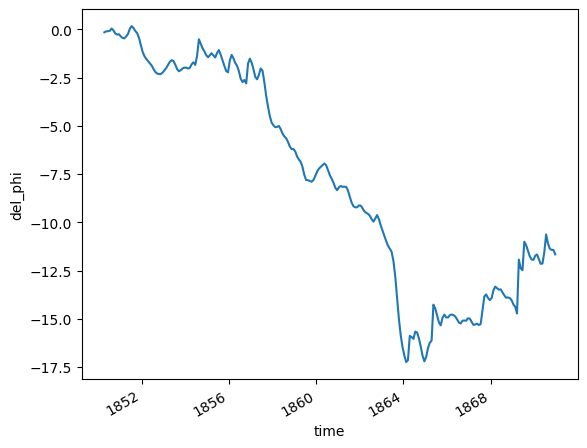

In [ ]:
ds_im.del_phi.plot()

In [ ]:
ds_pr_anom

<xarray.DataArray 'pr' (time: 249, lat: 64, lon: 128)>
dask.array<mul, shape=(249, 64, 128), dtype=float64, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-04-16 ... 1870-12-16T12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    month    (time) int64 4 5 6 7 8 9 10 11 12 1 2 ... 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
ds_im_jjas = ds_im[ds_im['time.month'].isin([6, 7, 8, 9])].resample(time='Y').mean('time')

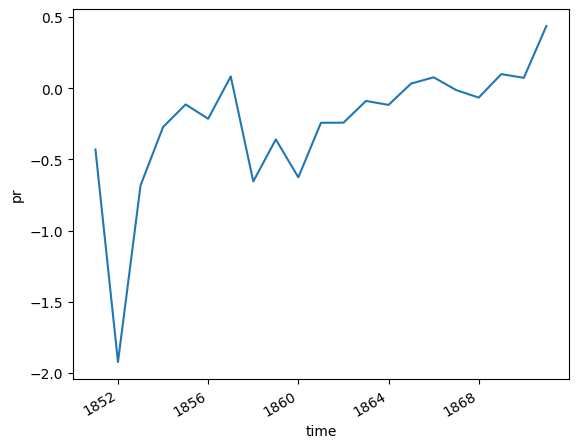

In [ ]:
ds_im_jjas.plot()

In [ ]:
ds_nino34_jjas = ds_nino34[ds_nino34['time.month'].isin([6, 7, 8, 9])].resample(time='Y').mean('time')

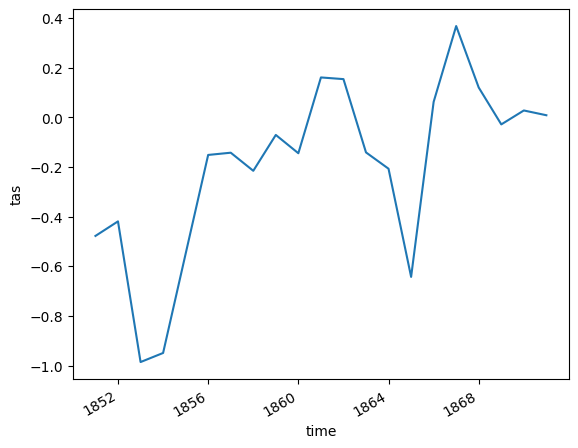

In [ ]:
ds_nino34_jjas.plot()

In [ ]:
#ds_pr_anom#pr long
#ds_tas_anom#tas long
#ds_pr_piC#PIC pr
#ds_tas_piC#PIC tas
import matplotlib.pyplot as plt
Global_pr = ds_pr_anom.mean(dim='lat').mean(dim='lon')
Global_pr_piC = ds_pr_piC.mean(dim="lat").mean(dim = "lon").sel(time=slice('1850-04-16', '1870-12-16')).groupby("time.year").mean()

#plt.plot(Global_pr.time, Global_pr.values, label = "Global_pr", color = "blue")
#plt.plot(Global_pr.time, Global_pr_piC.values, label = "PiC", color = "red")


In [ ]:
Global_pr_piC.year.values

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870])

In [ ]:
#Global_pr

Global_pr.time.groupby('time.year')

DataArrayGroupBy, grouped over 'year'
21 groups with labels 1850, 1851, 1852, ..., 1869, 1870.

In [ ]:
ens = ['r10i1p1f2', 'r11i1p1f2', 'r12i1p1f2', 'r13i1p1f2', 'r14i1p1f2', 'r15i1p1f2', 'r16i1p1f2', 'r17i1p1f2', 'r18i1p1f2', 'r19i1p1f2', 'r1i1p1f2', 'r20i1p1f2', \
        'r21i1p1f2', 'r22i1p1f2', 'r23i1p1f2', 'r24i1p1f2', 'r25i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2', 'r7i1p1f2', 'r8i1p1f2', 'r9i1p1f2']

In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc

--2024-01-09 06:54:58--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r10i1p1f2/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 1173313 (1.1M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]   1.12M  1.16MB/s    in 1.0s    

2024-01-09 06:55:00 (1.16 MB/s) - ‘pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’ saved [1173313/1173313]

--2024-01-09 06:55:00--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r10i1p1f2/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1

In [ ]:
ds_pr_pinatubo  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_pinatubo = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')

In [ ]:
ds_pr_pinatubo_anom  = (ds_pr_pinatubo.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_pinatubo_anom = ds_tas_pinatubo.tas.groupby('time.month') - tas_monthly_climatology

Text(0.53, 1, 'Volc-Pinatubo-Full (Precipitation)')

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


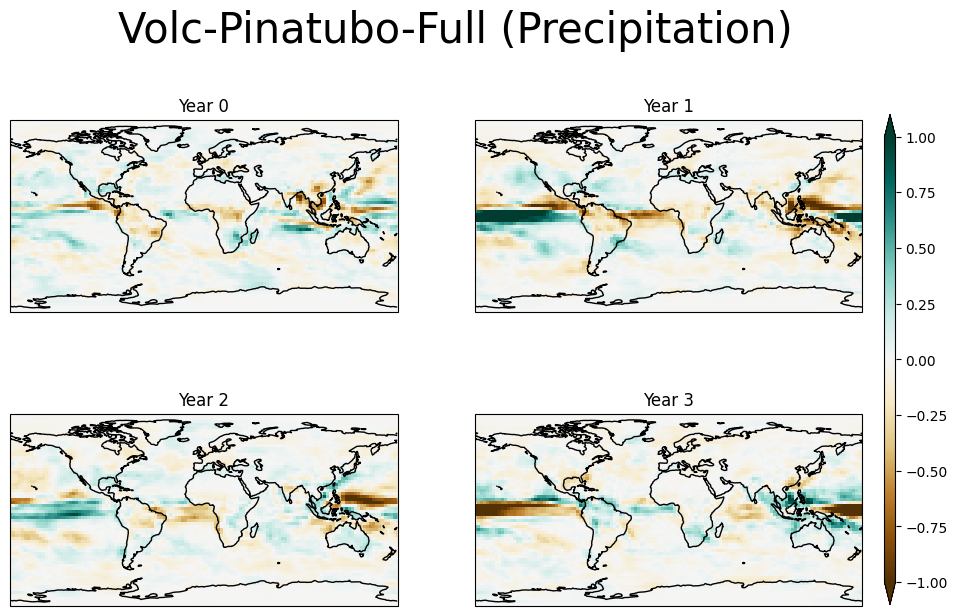

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11,7), subplot_kw={'projection': ccrs.PlateCarree()})
m1 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='BrBG', vmax=1, vmin=-1, add_colorbar = False, ax=ax[0,0])
m2 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='BrBG', vmax=1, vmin=-1, add_colorbar = False, ax=ax[0,1])
m3 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).plot(cmap='BrBG', vmax=1, vmin=-1, add_colorbar = False, ax=ax[1,0])
m4 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).plot(cmap='BrBG', vmax=1, vmin=-1, add_colorbar = False, ax=ax[1,1])
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(m2, cax=cbar1, extend = 'both')
title1 = ['Year 0', 'Year 2']
title2 = ['Year 1', 'Year 3']
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 0]
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 1]
    ax_.coastlines()
    ax_.set_title(title2[i_cnt])

fig.suptitle('Volc-Pinatubo-Full (Precipitation)', x= 0.53, y=1, fontsize=30)

Text(0.53, 1, 'Volc-Pinatubo-Full (Temperature)')

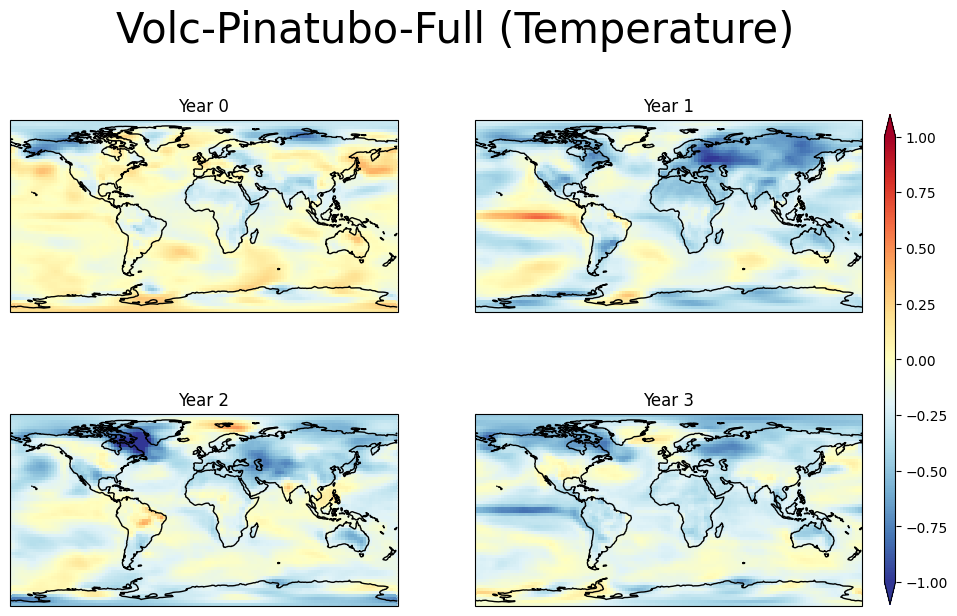

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11,7), subplot_kw={'projection': ccrs.PlateCarree()})
mp1 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='RdYlBu_r', vmax=1, vmin=-1, add_colorbar = False, ax=ax[0,0])
mp2 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='RdYlBu_r', vmax=1, vmin=-1, add_colorbar = False, ax=ax[0,1])
mp3 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).plot(cmap='RdYlBu_r', vmax=1, vmin=-1, add_colorbar = False, ax=ax[1,0])
mp4 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).plot(cmap='RdYlBu_r', vmax=1, vmin=-1, add_colorbar = False, ax=ax[1,1])
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(mp2, cax=cbar1, extend = 'both')
title1 = ['Year 0', 'Year 2']
title2 = ['Year 1', 'Year 3']
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 0]
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 1]
    ax_.coastlines()
    ax_.set_title(title2[i_cnt])

fig.suptitle('Volc-Pinatubo-Full (Temperature)', x= 0.53, y=1, fontsize=30)

In [ ]:
ens = ['r10i1p1f2',
       'r11i1p1f2',
       'r12i1p1f2',
       'r13i1p1f2',
       'r14i1p1f2',
       'r15i1p1f2',
       'r16i1p1f2',
       'r17i1p1f2',
       'r18i1p1f2',
       'r19i1p1f2',
       'r1i1p1f2',
       'r20i1p1f2',
       'r21i1p1f2',
       'r22i1p1f2',
       'r23i1p1f2',
       'r24i1p1f2',
       'r25i1p1f2',
       'r2i1p1f2',
       'r3i1p1f2',
       'r4i1p1f2',
       'r5i1p1f2',
       'r6i1p1f2',
       'r7i1p1f2',
       'r8i1p1f2',
       'r9i1p1f2']

In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/pr/gn/v20210317/pr_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/tas/gn/v20210317/tas_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/pr/gn/v20210118/pr_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/tas/gn/v20210118/tas_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc

--2024-01-09 06:56:24--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/r10i1p1f2/Amon/pr/gn/v20210317/pr_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 1172683 (1.1M) [application/x-netcdf]
Saving to: ‘pr_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc’

pr_Amon_MIROC-ES2L_ 100%[===================>]   1.12M  1.16MB/s    in 1.0s    

2024-01-09 06:56:25 (1.16 MB/s) - ‘pr_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc’ saved [1172683/1172683]

--2024-01-09 06:56:25--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/r10i1p1f2/Amon/tas/gn/v20210317/tas_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1

In [ ]:
ds_pr_surf  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_surf = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_pr_strat  = xr.open_mfdataset('pr_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_tas_strat = xr.open_mfdataset('tas_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')

In [ ]:
ds_pr_surf_anom  = (ds_pr_surf.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_surf_anom = ds_tas_surf.tas.groupby('time.month') - tas_monthly_climatology
ds_pr_strat_anom  = (ds_pr_strat.pr.groupby('time.month') - pr_monthly_climatology)*86400
ds_tas_strat_anom = ds_tas_strat.tas.groupby('time.month') - tas_monthly_climatology

Text(0.53, 1, 'Volc-Pinatubo-Surf (Precipitation)')

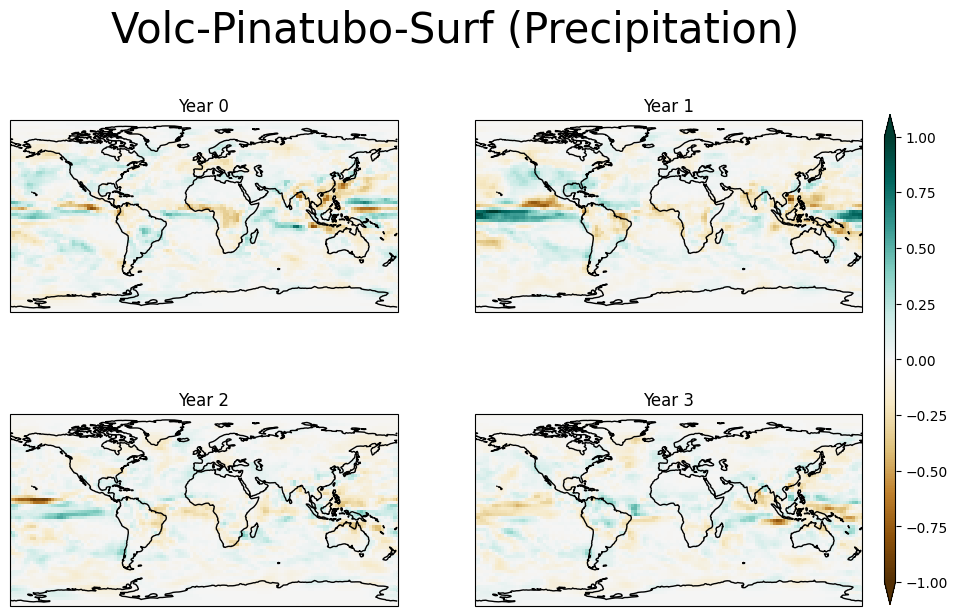

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11, 7), subplot_kw={'projection': ccrs.PlateCarree()})
im1 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='BrBG', vmax = 1, vmin = -1, ax=ax[0,0], add_colorbar = False)
im2 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='BrBG', vmax = 1, vmin = -1, ax=ax[0,1], add_colorbar = False)
im3 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=2).plot(cmap='BrBG', vmax = 1, vmin = -1, ax=ax[1,0], add_colorbar = False)
im4 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=3).plot(cmap='BrBG', vmax = 1, vmin = -1, ax=ax[1,1], add_colorbar = False)
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(im2, cax=cbar1, extend = 'both')
title1 = ['Year 0', 'Year 2']
title2 = ['Year 1', 'Year 3']
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 0]
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 1]
    ax_.coastlines()
    ax_.set_title(title2[i_cnt])

fig.suptitle('Volc-Pinatubo-Surf (Precipitation)', x= 0.53, y=1, fontsize=30)

Text(0.53, 1, 'Volc-Pinatubo-Strat (Precipitation)')

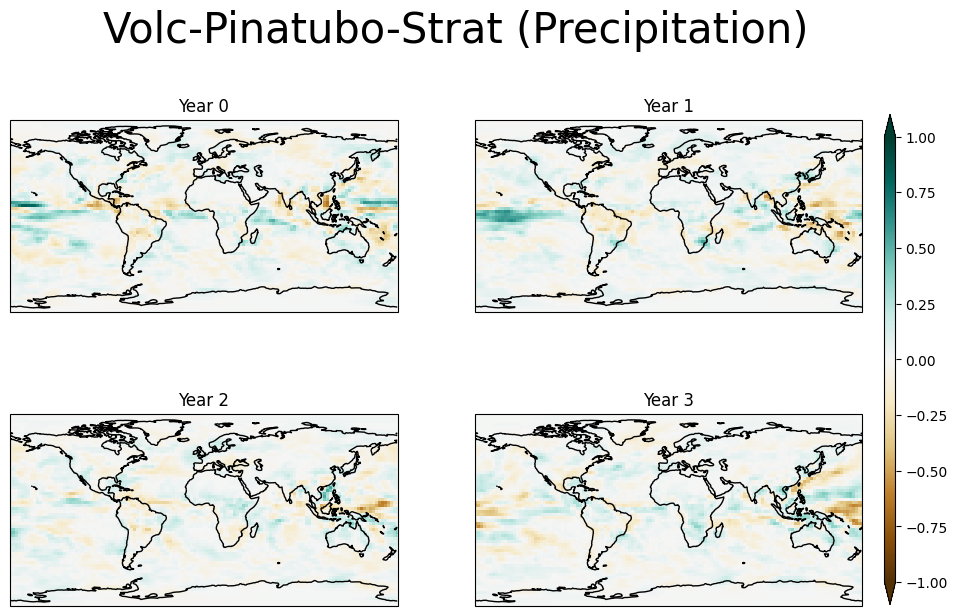

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11,7), subplot_kw={'projection': ccrs.PlateCarree()})
i1 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=0).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both',  ax=ax[0,0], add_colorbar = False)
i2 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=1).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both',  ax=ax[0,1], add_colorbar = False)
i3 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=2).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both',  ax=ax[1,0], add_colorbar = False)
i4 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=3).plot(cmap='BrBG', vmax=1, vmin=-1, extend='both',  ax=ax[1,1], add_colorbar = False)
title1 = ['Year 0', 'Year 2']
title2 = ['Year 1', 'Year 3']
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(i2, cax=cbar1, extend = 'both')
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 0]
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 1]
    ax_.coastlines()
    ax_.set_title(title2[i_cnt])

fig.suptitle('Volc-Pinatubo-Strat (Precipitation)', x= 0.53, y=1, fontsize=30)

Text(0.53, 1, 'Volc-Pinatubo-Surf (Temperature)')

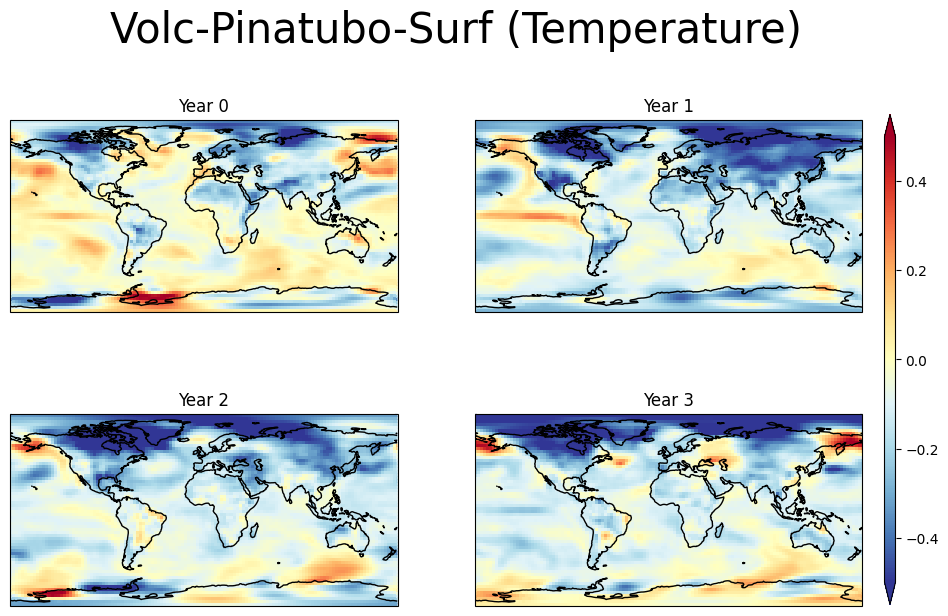

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11,7), subplot_kw={'projection': ccrs.PlateCarree()})
img1 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', ax=ax[0,0], add_colorbar = False)
img2 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', ax=ax[0,1], add_colorbar = False)
img3 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=2).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', ax=ax[1,0], add_colorbar = False)
img4 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=3).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', ax=ax[1,1], add_colorbar = False)

title1 = ['Year 0', 'Year 2']
title2 = ['Year 1', 'Year 3']
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(img2, cax=cbar1, extend = 'both')
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 0]
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 1]
    ax_.coastlines()
    ax_.set_title(title2[i_cnt])

fig.suptitle('Volc-Pinatubo-Surf (Temperature)', x= 0.53, y=1, fontsize=30)

Text(0.53, 1, 'Volc-Pinatubo-Strat (Temperature)')

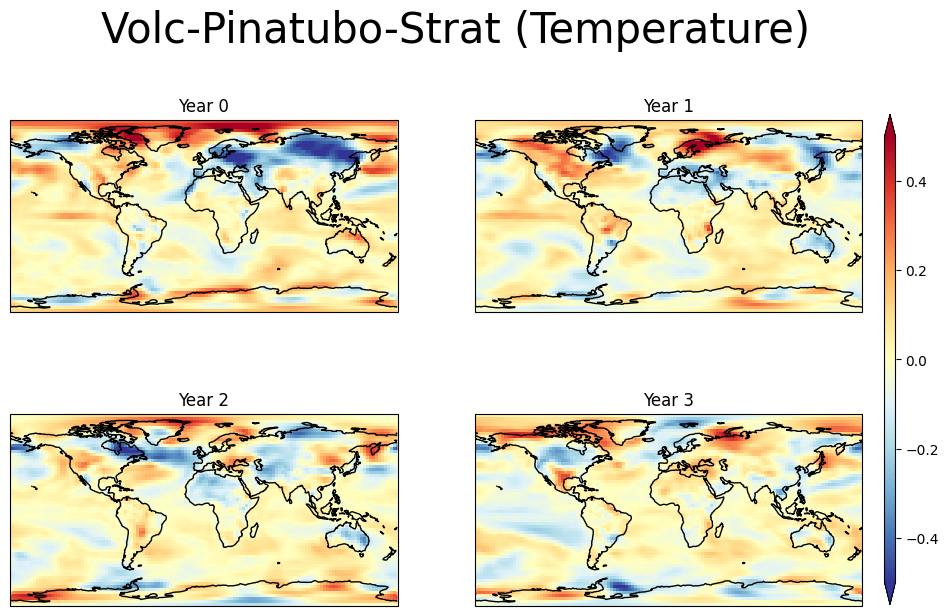

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2,nrows=2, figsize=(11,7), subplot_kw={'projection': ccrs.PlateCarree()})
map1 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', add_colorbar= False, ax=ax[0,0])
map2 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', add_colorbar= False, ax=ax[0,1])
map3 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=2).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', add_colorbar= False, ax=ax[1,0])
map4 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=3).plot(vmax=0.5, vmin=-0.5, cmap='RdYlBu_r', add_colorbar= False, ax=ax[1,1])
title1 = ['Year 0', 'Year 2']
title2 = ['Year 1', 'Year 3']
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = plt.colorbar(map2, cax=cbar1, extend = 'both')
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 0]
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt, 1]
    ax_.coastlines()
    ax_.set_title(title2[i_cnt])

fig.suptitle('Volc-Pinatubo-Strat (Temperature)', x= 0.53, y=1, fontsize=30)

In [ ]:
ds_tas_surf_anom

<xarray.DataArray 'tas' (time: 43, lat: 64, lon: 128)>
dask.array<sub, shape=(43, 64, 128), dtype=float32, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-06-16 ... 1853-12-16T12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   (time) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0 2.0
    month    (time) int64 6 7 8 9 10 11 12 1 2 3 4 ... 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
# Surf temp
Nino3 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino3_avgtas1 = Nino3.mean(dim=['lat','lon'])
Nino34 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino34_avgtas1 = Nino34.mean(dim=['lat','lon'])
Nino31 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino31_avgtas1 = Nino31.mean(dim=['lat','lon'])
Nino341 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino341_avgtas1 = Nino341.mean(dim=['lat','lon'])
Nino32 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino32_avgtas1 = Nino32.mean(dim=['lat','lon'])
Nino342 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino342_avgtas1 = Nino342.mean(dim=['lat','lon'])
Nino33 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino33_avgtas1 = Nino33.mean(dim=['lat','lon'])
Nino343 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino343_avgtas1 = Nino343.mean(dim=['lat','lon'])
Core = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(14, 28), lon = slice(73, 87))
Core_avgtas1 = Core.mean(dim=['lat','lon'])
Core1 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(14,28), lon = slice(73, 87))
Core1_avgtas1 = Core1.mean(dim=['lat','lon'])
Core2 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(14, 28), lon = slice(73, 87))
Core2_avgtas1 = Core2.mean(dim=['lat','lon'])
Core3 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(14, 28), lon = slice(73, 87))
Core3_avgtas1 = Core3.mean(dim=['lat','lon'])
from tabulate import tabulate


data = [['Year 0', Nino3_avgtas1.values, Nino34_avgtas1.values, Core_avgtas1.values],
        ['Year 1', Nino31_avgtas1.values, Nino341_avgtas1.values, Core1_avgtas1.values],
        ['Year 2', Nino32_avgtas1.values, Nino342_avgtas1.values, Core2_avgtas1.values],
        ['Year 3', Nino33_avgtas1.values, Nino343_avgtas1.values, Core3_avgtas1.values]]
table = tabulate(data, headers=["Year","Nino 3","Nino 3.4","Indian Core Monsoon Region"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Surface Temperature")
print(table1)

Surface Temperature
+--------+------------+------------+------------------------------+
| Year   |     Nino 3 |   Nino 3.4 |   Indian Core Monsoon Region |
+========+============+============+==============================+
| Year 0 |  0.0727996 |  0.0752674 |                   -0.197534  |
+--------+------------+------------+------------------------------+
| Year 1 |  0.148976  |  0.143135  |                   -0.165311  |
+--------+------------+------------+------------------------------+
| Year 2 | -0.0296233 | -0.0560152 |                   -0.0730015 |
+--------+------------+------------+------------------------------+
| Year 3 | -0.156221  | -0.180498  |                   -0.116628  |
+--------+------------+------------+------------------------------+


In [ ]:
#Surf pr
Nino3 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino3_avgpr1 = Nino3.mean(dim=['lat','lon'])
Nino34 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino34_avgpr1 = Nino34.mean(dim=['lat','lon'])
Nino31 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino31_avgpr1 = Nino31.mean(dim=['lat','lon'])
Nino341 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino341_avgpr1 = Nino341.mean(dim=['lat','lon'])
Nino32 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino32_avgpr1 = Nino32.mean(dim=['lat','lon'])
Nino342 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino342_avgpr1 = Nino342.mean(dim=['lat','lon'])
Nino33 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino33_avgpr1 = Nino33.mean(dim=['lat','lon'])
Nino343 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino343_avgpr1 = Nino343.mean(dim=['lat','lon'])
from tabulate import tabulate
Core = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(14, 28), lon = slice(73, 87))
Core_avgpr1 = Core.mean(dim=['lat','lon'])
Core1 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(14,28), lon = slice(73, 87))
Core1_avgpr1 = Core1.mean(dim=['lat','lon'])
Core2 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(14, 28), lon = slice(73, 87))
Core2_avgpr1 = Core2.mean(dim=['lat','lon'])
Core3 = ds_pr_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(14, 28), lon = slice(73, 87))
Core3_avgpr1 = Core3.mean(dim=['lat','lon'])
from tabulate import tabulate


data = [['Year 0', Nino3_avgpr1.values, Nino34_avgpr1.values, Core_avgpr1.values],
        ['Year 1', Nino31_avgpr1.values, Nino341_avgpr1.values, Core1_avgpr1.values],
        ['Year 2', Nino32_avgpr1.values, Nino342_avgpr1.values, Core2_avgpr1.values],
        ['Year 3', Nino33_avgpr1.values, Nino343_avgpr1.values, Core3_avgpr1.values]]
table = tabulate(data, headers=["Year","Nino 3","Nino 3.4","Indian Core Monsoon Region"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Surface Precipitation")
print(table1)

Surface Precipitation
+--------+------------+------------+------------------------------+
| Year   |     Nino 3 |   Nino 3.4 |   Indian Core Monsoon Region |
+========+============+============+==============================+
| Year 0 |  0.0782156 |   0.16042  |                  -0.0527229  |
+--------+------------+------------+------------------------------+
| Year 1 |  0.429088  |   0.590364 |                  -0.194832   |
+--------+------------+------------+------------------------------+
| Year 2 |  0.231422  |   0.177357 |                   0.00929104 |
+--------+------------+------------+------------------------------+
| Year 3 | -0.144451  |  -0.230657 |                  -0.0877786  |
+--------+------------+------------+------------------------------+


In [ ]:
# Strat temp
Nino3 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino3_avgtas1 = Nino3.mean(dim=['lat','lon'])
Nino34 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino34_avgtas1 = Nino34.mean(dim=['lat','lon'])
Nino31 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino31_avgtas1 = Nino31.mean(dim=['lat','lon'])
Nino341 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino341_avgtas1 = Nino341.mean(dim=['lat','lon'])
Nino32 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino32_avgtas1 = Nino32.mean(dim=['lat','lon'])
Nino342 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino342_avgtas1 = Nino342.mean(dim=['lat','lon'])
Nino33 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino33_avgtas1 = Nino33.mean(dim=['lat','lon'])
Nino343 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino343_avgtas1 = Nino343.mean(dim=['lat','lon'])
from tabulate import tabulate
Core = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(14, 28), lon = slice(73, 87))
Core_avgtas1 = Core.mean(dim=['lat','lon'])
Core1 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(14,28), lon = slice(73, 87))
Core1_avgtas1 = Core1.mean(dim=['lat','lon'])
Core2 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(14, 28), lon = slice(73, 87))
Core2_avgtas1 = Core2.mean(dim=['lat','lon'])
Core3 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(14, 28), lon = slice(73, 87))
Core3_avgtas1 = Core3.mean(dim=['lat','lon'])
data = [['Year 0', Nino3_avgtas1.values, Nino34_avgtas1.values, Core_avgtas1.values],
        ['Year 1', Nino31_avgtas1.values, Nino341_avgtas1.values, Core1_avgtas1.values],
        ['Year 2', Nino32_avgtas1.values, Nino342_avgtas1.values, Core2_avgtas1.values],
        ['Year 3', Nino33_avgtas1.values, Nino343_avgtas1.values, Core3_avgtas1.values]]
table = tabulate(data, headers=["Year","Nino 3","Nino 3.4","Indian Core Monsoon Region"], tablefmt='grid')

white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Stratospheric Temperature")
print(table1)

Stratospheric Temperature
+--------+-------------+-------------+------------------------------+
| Year   |      Nino 3 |    Nino 3.4 |   Indian Core Monsoon Region |
+========+=============+=============+==============================+
| Year 0 |  0.116891   |  0.0962261  |                    0.0292275 |
+--------+-------------+-------------+------------------------------+
| Year 1 |  0.122512   |  0.142699   |                   -0.0198586 |
+--------+-------------+-------------+------------------------------+
| Year 2 |  0.00304768 | -0.00918007 |                    0.0156069 |
+--------+-------------+-------------+------------------------------+
| Year 3 | -0.0772006  | -0.102139   |                   -0.0365505 |
+--------+-------------+-------------+------------------------------+


In [ ]:
#Strat pr
Nino3 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino3_avgpr1 = Nino3.mean(dim=['lat','lon'])
Nino34 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino34_avgpr1 = Nino34.mean(dim=['lat','lon'])
Nino31 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino31_avgpr1 = Nino31.mean(dim=['lat','lon'])
Nino341 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino341_avgpr1 = Nino341.mean(dim=['lat','lon'])
Nino32 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino32_avgpr1 = Nino32.mean(dim=['lat','lon'])
Nino342 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino342_avgpr1 = Nino342.mean(dim=['lat','lon'])
Nino33 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino33_avgpr1 = Nino33.mean(dim=['lat','lon'])
Nino343 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino343_avgpr1 = Nino343.mean(dim=['lat','lon'])
from tabulate import tabulate
Core = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(14, 28), lon = slice(73, 87))
Core_avgpr1 = Core.mean(dim=['lat','lon'])
Core1 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(14,28), lon = slice(73, 87))
Core1_avgpr1 = Core1.mean(dim=['lat','lon'])
Core2 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(14, 28), lon = slice(73, 87))
Core2_avgpr1 = Core2.mean(dim=['lat','lon'])
Core3 = ds_pr_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(14, 28), lon = slice(73, 87))
Core3_avgpr1 = Core3.mean(dim=['lat','lon'])
data = [['Year 0', Nino3_avgpr1.values, Nino34_avgpr1.values, Core_avgpr1.values],
        ['Year 1', Nino31_avgpr1.values, Nino341_avgpr1.values, Core1_avgpr1.values],
        ['Year 2', Nino32_avgpr1.values, Nino342_avgpr1.values, Core2_avgpr1.values],
        ['Year 3', Nino33_avgpr1.values, Nino343_avgpr1.values, Core3_avgpr1.values]]
table = tabulate(data, headers=["Year","Nino 3","Nino 3.4","Indian Core Monsoon Region"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Stratospheric Precipitation")
print(table1)

Stratospheric Precipitation
+--------+------------+------------+------------------------------+
| Year   |     Nino 3 |   Nino 3.4 |   Indian Core Monsoon Region |
+========+============+============+==============================+
| Year 0 | 0.176117   |  0.219208  |                  -0.0666645  |
+--------+------------+------------+------------------------------+
| Year 1 | 0.303007   |  0.465066  |                   0.00706826 |
+--------+------------+------------+------------------------------+
| Year 2 | 0.00777399 |  0.026074  |                  -0.00309815 |
+--------+------------+------------+------------------------------+
| Year 3 | 0.0682996  | -0.0732475 |                   0.0442296  |
+--------+------------+------------+------------------------------+


In [ ]:
#Strat pr
Nino3 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino3_avgpr1 = Nino3.mean(dim=['lat','lon'])
Nino34 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino34_avgpr1 = Nino34.mean(dim=['lat','lon'])
Nino31 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino31_avgpr1 = Nino31.mean(dim=['lat','lon'])
Nino341 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino341_avgpr1 = Nino341.mean(dim=['lat','lon'])
Nino32 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino32_avgpr1 = Nino32.mean(dim=['lat','lon'])
Nino342 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino342_avgpr1 = Nino342.mean(dim=['lat','lon'])
Nino33 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino33_avgpr1 = Nino33.mean(dim=['lat','lon'])
Nino343 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino343_avgpr1 = Nino343.mean(dim=['lat','lon'])
Core = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(14, 28), lon = slice(73, 87))
Core_avgpr1 = Core.mean(dim=['lat','lon'])
Core1 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(14,28), lon = slice(73, 87))
Core1_avgpr1 = Core1.mean(dim=['lat','lon'])
Core2 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(14, 28), lon = slice(73, 87))
Core2_avgpr1 = Core2.mean(dim=['lat','lon'])
Core3 = ds_pr_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(14, 28), lon = slice(73, 87))
Core3_avgpr1 = Core3.mean(dim=['lat','lon'])
data = [['Year 0', Nino3_avgpr1.values, Nino34_avgpr1.values, Core_avgpr1.values],
        ['Year 1', Nino31_avgpr1.values, Nino341_avgpr1.values, Core1_avgpr1.values],
        ['Year 2', Nino32_avgpr1.values, Nino342_avgpr1.values, Core2_avgpr1.values],
        ['Year 3', Nino33_avgpr1.values, Nino343_avgpr1.values, Core3_avgpr1.values]]
table = tabulate(data, headers=["Year","Nino 3","Nino 3.4","Indian Core Monsoon Region"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Pinatubo Full Precipitation")
print(table1)

Pinatubo Full Precipitation
+--------+-----------+------------+------------------------------+
| Year   |    Nino 3 |   Nino 3.4 |   Indian Core Monsoon Region |
+========+===========+============+==============================+
| Year 0 |  0.128325 |   0.203259 |                   -0.0792571 |
+--------+-----------+------------+------------------------------+
| Year 1 |  0.845899 |   1.20909  |                   -0.133313  |
+--------+-----------+------------+------------------------------+
| Year 2 |  0.454726 |   0.418906 |                   -0.106223  |
+--------+-----------+------------+------------------------------+
| Year 3 | -0.553195 |  -0.896881 |                    0.072191  |
+--------+-----------+------------+------------------------------+


In [ ]:
#Strat pr
Nino3 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino3_avgpr1 = Nino3.mean(dim=['lat','lon'])
Nino34 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino34_avgpr1 = Nino34.mean(dim=['lat','lon'])
Nino31 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino31_avgpr1 = Nino31.mean(dim=['lat','lon'])
Nino341 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino341_avgpr1 = Nino341.mean(dim=['lat','lon'])
Nino32 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino32_avgpr1 = Nino32.mean(dim=['lat','lon'])
Nino342 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino342_avgpr1 = Nino342.mean(dim=['lat','lon'])
Nino33 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(210, 270))
Nino33_avgpr1 = Nino33.mean(dim=['lat','lon'])
Nino343 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(-5,5), lon = slice(190, 240))
Nino343_avgpr1 = Nino343.mean(dim=['lat','lon'])
from tabulate import tabulate
Core = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(lat = slice(14, 28), lon = slice(73, 87))
Core_avgtas1 = Core.mean(dim=['lat','lon'])
Core1 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(lat = slice(14,28), lon = slice(73, 87))
Core1_avgtas1 = Core1.mean(dim=['lat','lon'])
Core2 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(lat = slice(14, 28), lon = slice(73, 87))
Core2_avgtas1 = Core2.mean(dim=['lat','lon'])
Core3 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(lat = slice(14, 28), lon = slice(73, 87))
Core3_avgtas1 = Core3.mean(dim=['lat','lon'])
data = [['Year 0', Nino3_avgtas1.values, Nino34_avgtas1.values, Core_avgtas1.values],
        ['Year 1', Nino31_avgtas1.values, Nino341_avgtas1.values, Core1_avgtas1.values],
        ['Year 2', Nino32_avgtas1.values, Nino342_avgtas1.values, Core2_avgtas1.values],
        ['Year 3', Nino33_avgtas1.values, Nino343_avgtas1.values, Core3_avgtas1.values]]
table = tabulate(data, headers=["Year","Nino 3","Nino 3.4","Indian Core Monsoon Region"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Pinatubo Full Temperature")
print(table1)

Pinatubo Full Temperature
+--------+-------------+-------------+------------------------------+
| Year   |      Nino 3 |    Nino 3.4 |   Indian Core Monsoon Region |
+========+=============+=============+==============================+
| Year 0 |  0.116891   |  0.0962261  |                   -0.283083  |
+--------+-------------+-------------+------------------------------+
| Year 1 |  0.122512   |  0.142699   |                   -0.399804  |
+--------+-------------+-------------+------------------------------+
| Year 2 |  0.00304768 | -0.00918007 |                    0.0261837 |
+--------+-------------+-------------+------------------------------+
| Year 3 | -0.0772006  | -0.102139   |                   -0.22815   |
+--------+-------------+-------------+------------------------------+


In [ ]:
import xarray as xr

wio_coords = dict(lat=slice(-10, 0), lon=slice(55, 70))
eio_coords = dict(lat=slice(-10, 0), lon=slice(90, 110))
wio_ssta = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_ssta = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=0).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmi = wio_ssta - eio_ssta
wio_ssta1 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_ssta1 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=1).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmi1 = wio_ssta1 - eio_ssta1
wio_ssta2 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_ssta2 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=2).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmi2 = wio_ssta2 - eio_ssta2
wio_ssta3 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_ssta3 = ds_tas_surf_anom.resample(time='Y').mean('time').isel(time=3).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmi3 = wio_ssta3 - eio_ssta3
from tabulate import tabulate

data = [['Year 0', wio_ssta, eio_ssta, dmi],
        ['Year 1', wio_ssta1, eio_ssta1, dmi1],
        ['Year 2', wio_ssta2, eio_ssta2, dmi2],
        ['Year 3', wio_ssta3, eio_ssta3, dmi3]]
table = tabulate(data, headers=["Year","Western Indian Ocean Temperature (Surface)", "Eastern Indian Ocean Temperature (Surface)", "Dipole Mode Index"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Surface DMI Calculation")
print(table1)


Surface DMI Calculation
+--------+----------------------------------------------+----------------------------------------------+---------------------+
| Year   |   Western Indian Ocean Temperature (Surface) |   Eastern Indian Ocean Temperature (Surface) |   Dipole Mode Index |
+========+==============================================+==============================================+=====================+
| Year 0 |                                   -0.0540165 |                                   -0.019578  |         -0.0344386  |
+--------+----------------------------------------------+----------------------------------------------+---------------------+
| Year 1 |                                   -0.0740865 |                                   -0.0767708 |          0.00268428 |
+--------+----------------------------------------------+----------------------------------------------+---------------------+
| Year 2 |                                   -0.0829231 |                              

In [ ]:
wio_t = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=0).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit = wio_t - eio_t
wio_t1 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t1 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=1).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit1 = wio_t1 - eio_t1
wio_t2 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t2 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=2).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit2 = wio_t2 - eio_t2
wio_t3 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t3 = ds_tas_strat_anom.resample(time='Y').mean('time').isel(time=3).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit3 = wio_t3 - eio_t3
from tabulate import tabulate

data = [['Year 0', wio_t, eio_t, dmit],
        ['Year 1', wio_t1, eio_t1, dmit1],
        ['Year 2', wio_t2, eio_t2, dmit2],
        ['Year 3', wio_t3, eio_t3, dmit3]]
table = tabulate(data, headers=["Year","Western Indian Ocean Temperature (Stratosphere)", "Eastern Indian Ocean Temperature (Stratosphere)", "Dipole Mode Index"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Stratospheric DMI Calculation")
print(table1)


Stratospheric DMI Calculation
+--------+---------------------------------------------------+---------------------------------------------------+---------------------+
| Year   |   Western Indian Ocean Temperature (Stratosphere) |   Eastern Indian Ocean Temperature (Stratosphere) |   Dipole Mode Index |
+========+===================================================+===================================================+=====================+
| Year 0 |                                         0.0660418 |                                         0.0207676 |           0.0452742 |
+--------+---------------------------------------------------+---------------------------------------------------+---------------------+
| Year 1 |                                         0.0230882 |                                         0.0582309 |          -0.0351427 |
+--------+---------------------------------------------------+---------------------------------------------------+---------------------+
| Year 2 | 

In [ ]:
wio_t = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=0).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit = wio_t - eio_t
wio_t1 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t1 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=1).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit1 = wio_t1 - eio_t1
wio_t2 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t2 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=2).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit2 = wio_t2 - eio_t2
wio_t3 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(**wio_coords).mean(dim=['lat', 'lon'])
eio_t3 = ds_tas_pinatubo_anom.resample(time='Y').mean('time').isel(time=3).sel(**eio_coords).mean(dim=['lat', 'lon'])
dmit3 = wio_t3 - eio_t3
from tabulate import tabulate

data = [['Year 0', wio_t, eio_t, dmit],
        ['Year 1', wio_t1, eio_t1, dmit1],
        ['Year 2', wio_t2, eio_t2, dmit2],
        ['Year 3', wio_t3, eio_t3, dmit3]]
table = tabulate(data, headers=["Year","Western Indian Ocean Temperature (Stratosphere)", "Eastern Indian Ocean Temperature (Stratosphere)", "Dipole Mode Index"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Pinatubo Full DMI Calculation")
print(table1)


Pinatubo Full DMI Calculation
+--------+---------------------------------------------------+---------------------------------------------------+---------------------+
| Year   |   Western Indian Ocean Temperature (Stratosphere) |   Eastern Indian Ocean Temperature (Stratosphere) |   Dipole Mode Index |
+========+===================================================+===================================================+=====================+
| Year 0 |                                        -0.115568  |                                        -0.0565382 |         -0.0590297  |
+--------+---------------------------------------------------+---------------------------------------------------+---------------------+
| Year 1 |                                        -0.173952  |                                        -0.171895  |         -0.00205664 |
+--------+---------------------------------------------------+---------------------------------------------------+---------------------+
| Year 2 | 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !gdalinfo /content/drive/MyDrive/Homogeneous_Region_Shape_File1.rar

In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/ua/gn/v20210118/ua_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc

--2024-01-09 07:01:57--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r10i1p1f2/Amon/ua/gn/v20210118/ua_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 19526197 (19M) [application/x-netcdf]
Saving to: ‘ua_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’

ua_Amon_MIROC-ES2L_ 100%[===================>]  18.62M  8.92MB/s    in 2.1s    

2024-01-09 07:01:59 (8.92 MB/s) - ‘ua_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’ saved [19526197/19526197]

--2024-01-09 07:01:59--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r11i1p1f2/Amon/ua/gn/v20210118/ua_Amon_MIROC-ES2L_volc-pinatubo-full_r11i1

In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/va/gn/v20210118/va_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc

--2024-01-09 07:03:01--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r10i1p1f2/Amon/va/gn/v20210118/va_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 20869032 (20M) [application/x-netcdf]
Saving to: ‘va_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’

va_Amon_MIROC-ES2L_ 100%[===================>]  19.90M  9.40MB/s    in 2.1s    

2024-01-09 07:03:04 (9.40 MB/s) - ‘va_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc’ saved [20869032/20869032]

--2024-01-09 07:03:04--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/r11i1p1f2/Amon/va/gn/v20210118/va_Amon_MIROC-ES2L_volc-pinatubo-full_r11i1

In [ ]:
ds_ua_pinatubo  = xr.open_mfdataset('ua_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_va_pinatubo = xr.open_mfdataset('va_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')

In [ ]:
vars = ['ua','va']
for var in vars:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc

--2024-01-09 07:04:09--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/ua/gn/v20190823/ua_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 1086940998 (1.0G) [application/x-netcdf]
Saving to: ‘ua_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’

ua_Amon_MIROC-ES2L_ 100%[===================>]   1.01G  18.0MB/s    in 59s     

2024-01-09 07:05:08 (17.6 MB/s) - ‘ua_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’ saved [1086940998/1086940998]

--2024-01-09 07:05:08--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/ua/gn/v20190823/ua_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
Resolving esgf-data02.diasjp.net

In [ ]:
!rm -rf *.1
!ls

pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
pr_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r1i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r2i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r3i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r4i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r5i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r6i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r7i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r8i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-long-eq_r9i1p1f2_gn_185004-187012.nc
pr_Amon_MIROC-ES2L_volc-pinatubo-full_r10i1p1f2_gn_185006-185312.nc
pr_Amon_MIROC-ES2L_volc-pinatubo-full_r11i1p1f2_gn_185006-185312.nc
pr_Amon_MIROC-ES2L_volc-pinatubo-full_r12i1p1f2_gn_185006-185312.nc
pr_Amon_MIROC-ES2L_volc-pinatubo-full_r13i1p1f2_gn_185006-185312.nc
pr_Am

In [ ]:
ds_ua_pinatubo  = xr.open_mfdataset('ua_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_va_pinatubo = xr.open_mfdataset('va_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')

In [ ]:
ds_ua_piC = xr.open_mfdataset('ua_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')
ds_va_piC = xr.open_mfdataset('va_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')

In [ ]:
ua_monthly_climatology = ds_ua_piC.ua.groupby('time.month').mean('time')
va_monthly_climatology = ds_va_piC.va.groupby('time.month').mean('time')

In [ ]:
ds_ua_pinatubo_anom  = ds_ua_pinatubo.ua.groupby('time.month') - ua_monthly_climatology
ds_va_pinatubo_anom = ds_va_pinatubo.va.groupby('time.month') - va_monthly_climatology

In [ ]:
Magu = ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(0,12)).mean(dim='time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values
Magv = ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(0,12)).mean(dim='time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values

<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used t

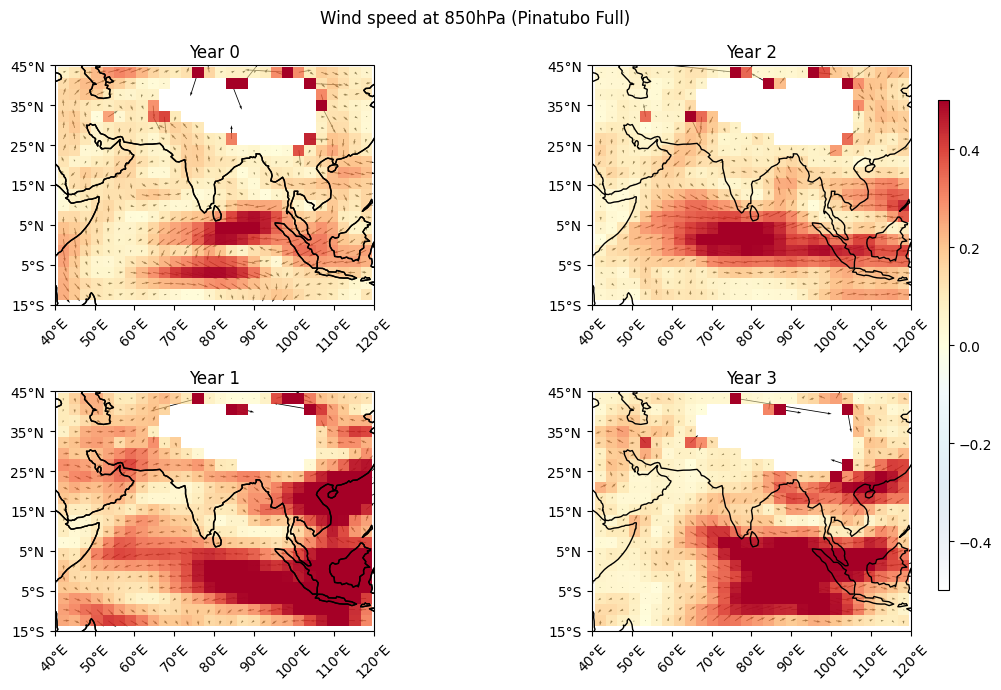

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap

def plot_wind_speed(ax, u_wind, v_wind, title):
    Mag = (u_wind**2 + v_wind**2)**0.5
    quiver = ax.quiver(lons, lats, u_wind, v_wind, transform=projection, color='black', linewidths=widths)
    pcm = ax.pcolormesh(lons, lats, Mag, cmap=LinearSegmentedColormap.from_list("cmap_transparent", cmap_transparent, cmap.N),
                        vmin=-0.5, vmax=0.5)
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_yticklabels(ytick_labels)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_title(title)
    return pcm

u_wind_ranges = [ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(-15, 45)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(40, 120)).values
lons, lats = np.meshgrid(lons, lats)
widths = np.linspace(0, 20, lons.size)
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(11, 7))
cmap = plt.cm.RdYlBu_r
cmap_transparent = cmap(np.arange(cmap.N))
cmap_transparent[:, -1] = np.linspace(0, 1, cmap.N)

xticks = np.arange(40, 121, 10)
yticks = np.arange(-15, 46, 10)
xtick_labels = ['{}°E'.format(t) for t in xticks]
ytick_labels = ['{}°N'.format(t) if t >= 0 else '{}°S'.format(-t) for t in yticks]

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_wind_speed(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    pcm = plot_wind_speed(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcm, cax=cbar1, orientation='vertical', cmap='RdYlBu_r')

plt.suptitle('Wind speed at 850hPa (Pinatubo Full)')
plt.tight_layout()
plt.show()


<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used t

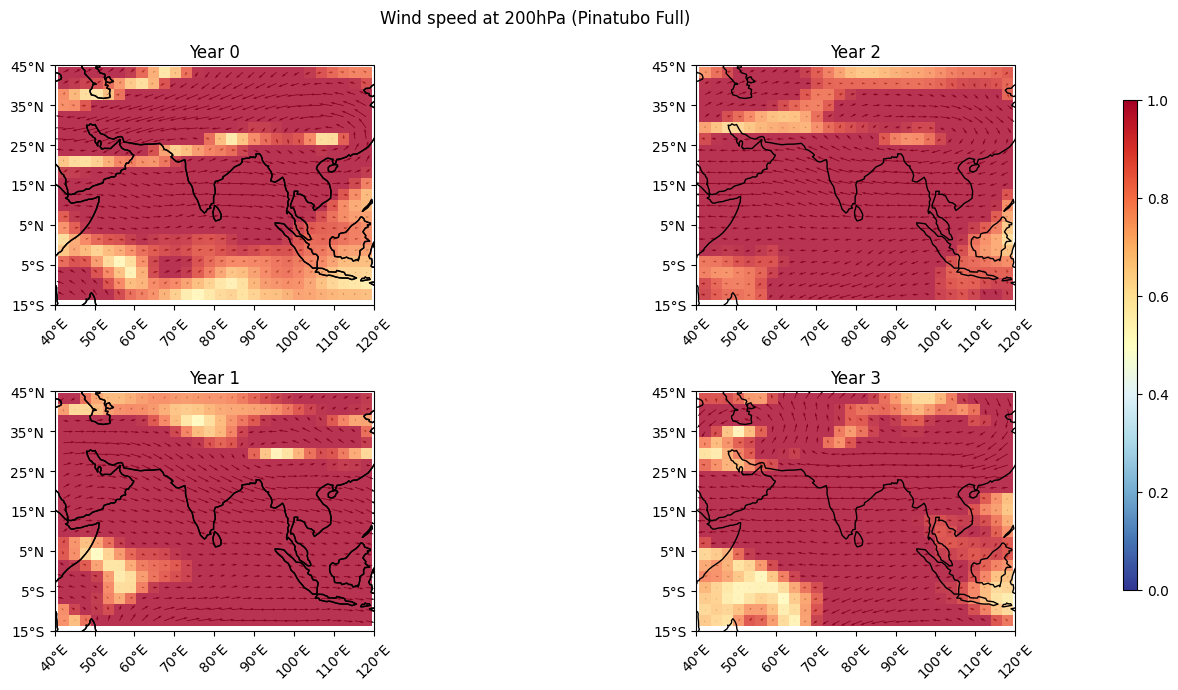

In [ ]:
u_wind_ranges = [ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]
def plot_wind_speed_200(ax, u_wind, v_wind, title):
    Mag = (u_wind**2 + v_wind**2)**0.5
    quiver = ax.quiver(lons, lats, u_wind, v_wind, transform=projection, color='black')
    pcm = ax.pcolormesh(lons, lats, Mag, cmap=LinearSegmentedColormap.from_list("cmap_transparent", cmap_transparent, cmap.N),
                        vmin=-0.5, vmax=0.5, alpha=0.8)
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_yticklabels(ytick_labels)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_title(title)
lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(-15, 45)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(40, 120)).values
lons, lats = np.meshgrid(lons, lats)

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(14, 7))
cmap = plt.cm.RdYlBu_r
cmap_transparent = cmap(np.arange(cmap.N))
cmap_transparent[:, -1] = np.linspace(0, 1, cmap.N)

xticks = np.arange(40, 121, 10)
yticks = np.arange(-15, 46, 10)
xtick_labels = ['{}°E'.format(t) for t in xticks]
ytick_labels = ['{}°N'.format(t) if t >= 0 else '{}°S'.format(-t) for t in yticks]

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_wind_speed_200(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    pcm = plot_wind_speed_200(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcm, cax=cbar1, orientation='vertical', cmap='RdYlBu_r')
cbar.set_alpha(0.8)
plt.suptitle('Wind speed at 200hPa (Pinatubo Full)')
plt.tight_layout()
plt.show()


In [ ]:
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/ua/gn/v20210317/ua_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/va/gn/v20210317/va_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/ua/gn/v20210118/ua_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/va/gn/v20210118/va_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc

--2024-01-09 07:14:29--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/r10i1p1f2/Amon/ua/gn/v20210317/ua_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 19518663 (19M) [application/x-netcdf]
Saving to: ‘ua_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc’

ua_Amon_MIROC-ES2L_ 100%[===================>]  18.61M  8.86MB/s    in 2.1s    

2024-01-09 07:14:32 (8.86 MB/s) - ‘ua_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1p1f2_gn_185006-185312.nc’ saved [19518663/19518663]

--2024-01-09 07:14:32--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/r10i1p1f2/Amon/va/gn/v20210317/va_Amon_MIROC-ES2L_volc-pinatubo-surf_r10i1

In [ ]:
ds_ua_surf  = xr.open_mfdataset('ua_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_va_surf = xr.open_mfdataset('va_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_ua_strat  = xr.open_mfdataset('ua_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_va_strat = xr.open_mfdataset('va_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_ua_surf_anom = ds_ua_surf.ua.groupby('time.month') - ua_monthly_climatology
ds_va_surf_anom = ds_va_surf.va.groupby('time.month') - va_monthly_climatology
ds_ua_strat_anom = ds_ua_strat.ua.groupby('time.month') - ua_monthly_climatology
ds_va_strat_anom = ds_va_strat.va.groupby('time.month') - va_monthly_climatology

<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used t

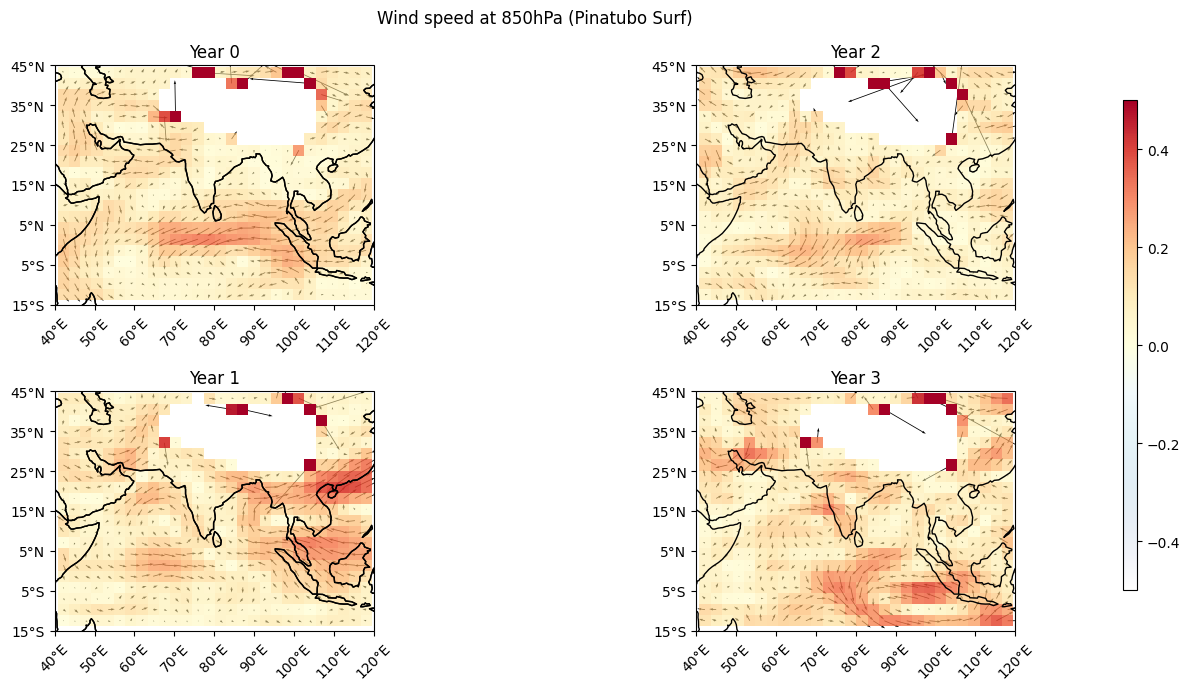

In [ ]:
u_wind_ranges = [ds_ua_surf_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_surf_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_surf_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_surf_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_surf_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_surf_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_surf_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_surf_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(-15, 45)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(40, 120)).values
lons, lats = np.meshgrid(lons, lats)

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(14, 7))
cmap = plt.cm.RdYlBu_r
cmap_transparent = cmap(np.arange(cmap.N))
cmap_transparent[:, -1] = np.linspace(0, 1, cmap.N)

xticks = np.arange(40, 121, 10)
yticks = np.arange(-15, 46, 10)
xtick_labels = ['{}°E'.format(t) for t in xticks]
ytick_labels = ['{}°N'.format(t) if t >= 0 else '{}°S'.format(-t) for t in yticks]

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_wind_speed(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    pcm = plot_wind_speed(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcm, cax=cbar1, orientation='vertical', cmap='RdYlBu_r')
plt.suptitle('Wind speed at 850hPa (Pinatubo Surf)')
plt.tight_layout()
plt.show()


<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used t

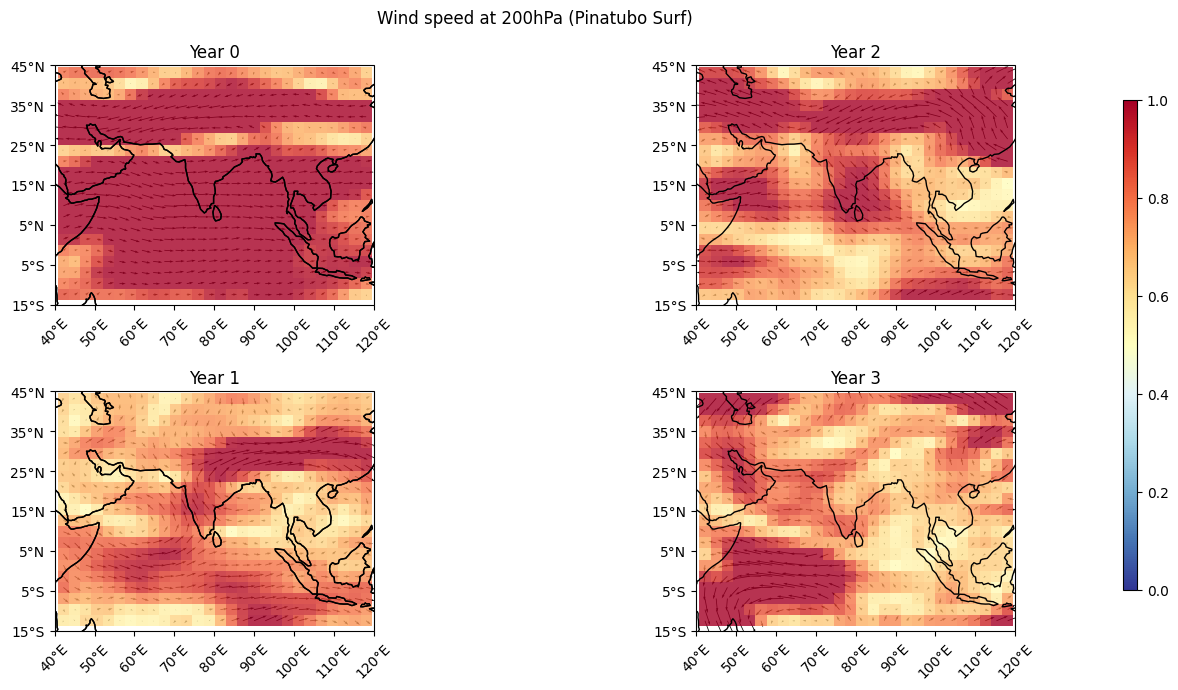

In [ ]:
u_wind_ranges = [ds_ua_surf_anom.sel(plev=20000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_surf_anom.sel(plev=20000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_surf_anom.sel(plev=20000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_surf_anom.sel(plev=20000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_surf_anom.sel(plev=20000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_surf_anom.sel(plev=20000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_surf_anom.sel(plev=20000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_surf_anom.sel(plev=20000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(-15, 45)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(40, 120)).values
lons, lats = np.meshgrid(lons, lats)

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(14, 7))
cmap = plt.cm.RdYlBu_r
cmap_transparent = cmap(np.arange(cmap.N))
cmap_transparent[:, -1] = np.linspace(0, 1, cmap.N)

xticks = np.arange(40, 121, 10)
yticks = np.arange(-15, 46, 10)
xtick_labels = ['{}°E'.format(t) for t in xticks]
ytick_labels = ['{}°N'.format(t) if t >= 0 else '{}°S'.format(-t) for t in yticks]

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_wind_speed_200(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    pcm = plot_wind_speed_200(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcm, cax=cbar1, orientation='vertical', cmap='RdYlBu_r')
cbar.set_alpha(0.8)
plt.suptitle('Wind speed at 200hPa (Pinatubo Surf)')
plt.tight_layout()
plt.show()


<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-68-e78cad4ed0ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-68-e78cad4ed0ac>:11: UserWarning: FixedFormatter should only be used t

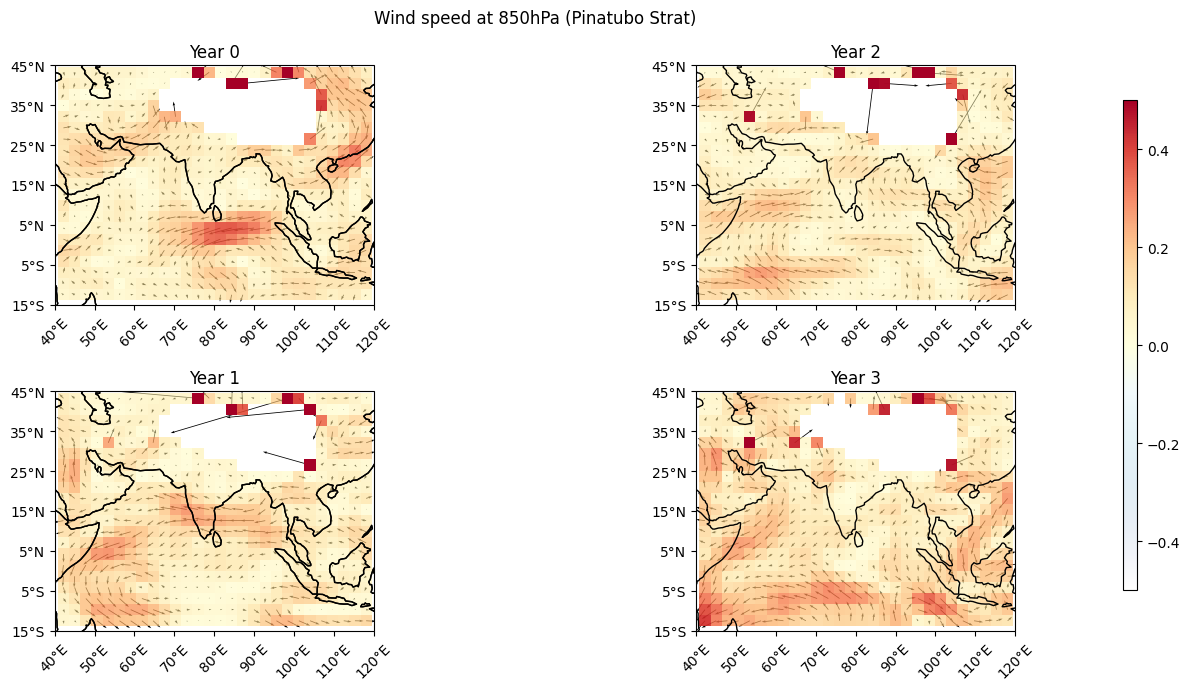

In [ ]:
u_wind_ranges = [ds_ua_strat_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_strat_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_strat_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_strat_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_strat_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_strat_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_strat_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_strat_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(-15, 45)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(40, 120)).values
lons, lats = np.meshgrid(lons, lats)

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(14, 7))
cmap = plt.cm.RdYlBu_r
cmap_transparent = cmap(np.arange(cmap.N))
cmap_transparent[:, -1] = np.linspace(0, 1, cmap.N)

xticks = np.arange(40, 121, 10)
yticks = np.arange(-15, 46, 10)
xtick_labels = ['{}°E'.format(t) for t in xticks]
ytick_labels = ['{}°N'.format(t) if t >= 0 else '{}°S'.format(-t) for t in yticks]

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_wind_speed(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    pcm = plot_wind_speed(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcm, cax=cbar1, orientation='vertical', cmap='RdYlBu_r')
plt.suptitle('Wind speed at 850hPa (Pinatubo Strat)')
plt.tight_layout()
plt.show()


<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=45)
<ipython-input-69-8a0dad0a60c1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ytick_labels)
<ipython-input-69-8a0dad0a60c1>:15: UserWarning: FixedFormatter should only be used t

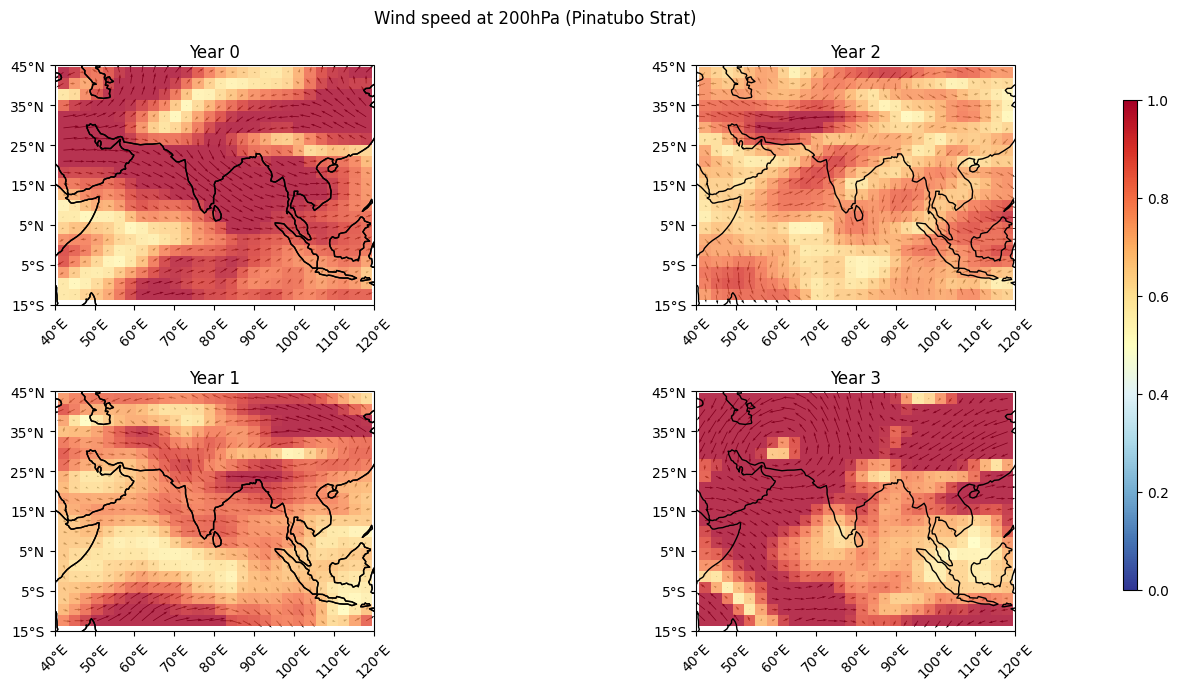

In [ ]:
u_wind_ranges = [ds_ua_strat_anom.sel(plev=20000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_strat_anom.sel(plev=20000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_strat_anom.sel(plev=20000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_ua_strat_anom.sel(plev=20000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_strat_anom.sel(plev=20000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_strat_anom.sel(plev=20000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_strat_anom.sel(plev=20000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                 ds_va_strat_anom.sel(plev=20000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(-15, 45)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(40, 120)).values
lons, lats = np.meshgrid(lons, lats)

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(14, 7))
cmap = plt.cm.RdYlBu_r
cmap_transparent = cmap(np.arange(cmap.N))
cmap_transparent[:, -1] = np.linspace(0, 1, cmap.N)

xticks = np.arange(40, 121, 10)
yticks = np.arange(-15, 46, 10)
xtick_labels = ['{}°E'.format(t) for t in xticks]
ytick_labels = ['{}°N'.format(t) if t >= 0 else '{}°S'.format(-t) for t in yticks]

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_wind_speed_200(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.coastlines()
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    pcm = plot_wind_speed_200(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], f'Wind speed at 850hPa (Year {i_cnt})')
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1
cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcm, cax=cbar1, orientation='vertical', cmap = 'RdYlBu_r')
cbar.set_alpha(0.8)
plt.suptitle('Wind speed at 200hPa (Pinatubo Strat)')
plt.tight_layout()
plt.show()


In [ ]:
#PIC
vars = ['hus']
for var in vars:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/{var}/gn/v20190823/{var}_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_225001-234912.nc

ds_hus_piC = xr.open_mfdataset('hus_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc')
hus_monthly_climatology = ds_hus_piC.hus.groupby('time.month').mean('time')
#Pinatubo Full
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-full/{mem}/Amon/hus/gn/v20210118/hus_Amon_MIROC-ES2L_volc-pinatubo-full_{mem}_gn_185006-185312.nc

ds_hus_pinatubo = xr.open_mfdataset('hus_Amon_MIROC-ES2L_volc-pinatubo-full*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_hus_pinatubo_anom = ds_hus_pinatubo.hus.groupby('time.month') - hus_monthly_climatology
#Pinatubo Surf and strat
for mem in ens:
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-surf/{mem}/Amon/hus/gn/v20210317/hus_Amon_MIROC-ES2L_volc-pinatubo-surf_{mem}_gn_185006-185312.nc
    !wget http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/VolMIP/MIROC/MIROC-ES2L/volc-pinatubo-strat/{mem}/Amon/hus/gn/v20210118/hus_Amon_MIROC-ES2L_volc-pinatubo-strat_{mem}_gn_185006-185312.nc

ds_hus_surf  = xr.open_mfdataset('hus_Amon_MIROC-ES2L_volc-pinatubo-surf*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_hus_strat  = xr.open_mfdataset('hus_Amon_MIROC-ES2L_volc-pinatubo-strat*.nc', combine='nested', concat_dim='ensemble').mean(dim='ensemble')
ds_hus_surf_anom = ds_hus_surf.hus.groupby('time.month') - hus_monthly_climatology
ds_hus_strat_anom = ds_hus_strat.hus.groupby('time.month') - hus_monthly_climatology

--2024-01-09 07:29:30--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/hus/gn/v20190823/hus_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc
Resolving esgf-data02.diasjp.net (esgf-data02.diasjp.net)... 157.1.137.53
Connecting to esgf-data02.diasjp.net (esgf-data02.diasjp.net)|157.1.137.53|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 959003137 (915M) [application/x-netcdf]
Saving to: ‘hus_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’

hus_Amon_MIROC-ES2L 100%[===================>] 914.58M  17.9MB/s    in 52s     

2024-01-09 07:30:23 (17.6 MB/s) - ‘hus_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_185001-204912.nc’ saved [959003137/959003137]

--2024-01-09 07:30:23--  http://esgf-data02.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Amon/hus/gn/v20190823/hus_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn_205001-224912.nc
Resolving esgf-data02.diasjp.

In [ ]:
!pip install netcdf4
!pip install metpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 9.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import pandas as pd
import cartopy.feature as cf
import metpy.calc as mpcalc

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


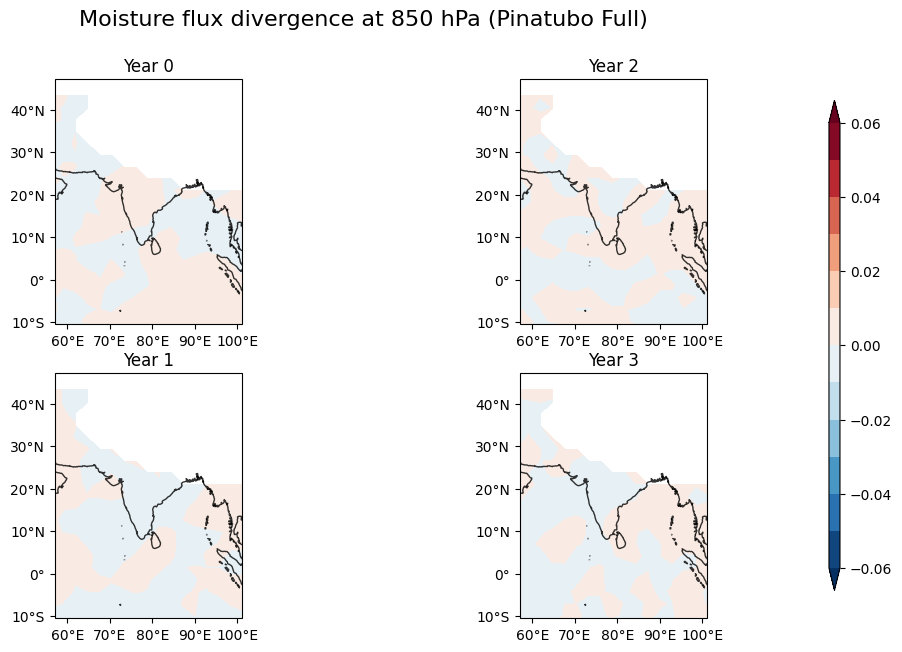

In [ ]:
 u_wind_ranges = [ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(11, 7))
huswind_ranges = [ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(0,12)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(13,24)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(25,36)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(37,48)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values]
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()

clevs = [-0.06,-0.05,-0.04,-0.03,-0.02,-0.01, 0,0.01,0.02,0.03,0.04,0.05,0.06]
def plot_mdf(ax, u_wind, v_wind, hus):
    uq=(u_wind)*(hus)
    vq=(v_wind)*(hus)
    dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)
    HMC_LE = (np.array(mpcalc.divergence(uq, vq, dx=dx, dy=dy)))
    lat=lats
    lon=lons
    u_=uq
    v_=vq
    # ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(alpha=0.8)
    ax.set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree())
    ax.set_yticks([-10,0,10,20,30,40], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_extent([57,101,-10,45])
    vp_fill = ax.contourf(lons,lats,HMC_LE*1000,clevs,transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r, extend='both')
    return vp_fill

title1 = ['Year 0', 'Year 1']
title2 = ['Year 2', 'Year 3']
cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_mdf(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], huswind_ranges[cnt])
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    vp_fill = plot_mdf(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], huswind_ranges[cnt])
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1

cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
# cbar = fig.colorbar(vp_fill, cax=cbar1, orientation='vertical', cmap='RdYlBu_r')
cbar.set_alpha(0.8)



plt.colorbar(vp_fill, cax = cbar1, orientation='vertical')
plt.suptitle('Moisture flux divergence at 850 hPa (Pinatubo Full) ', fontsize=16)
plt.show()


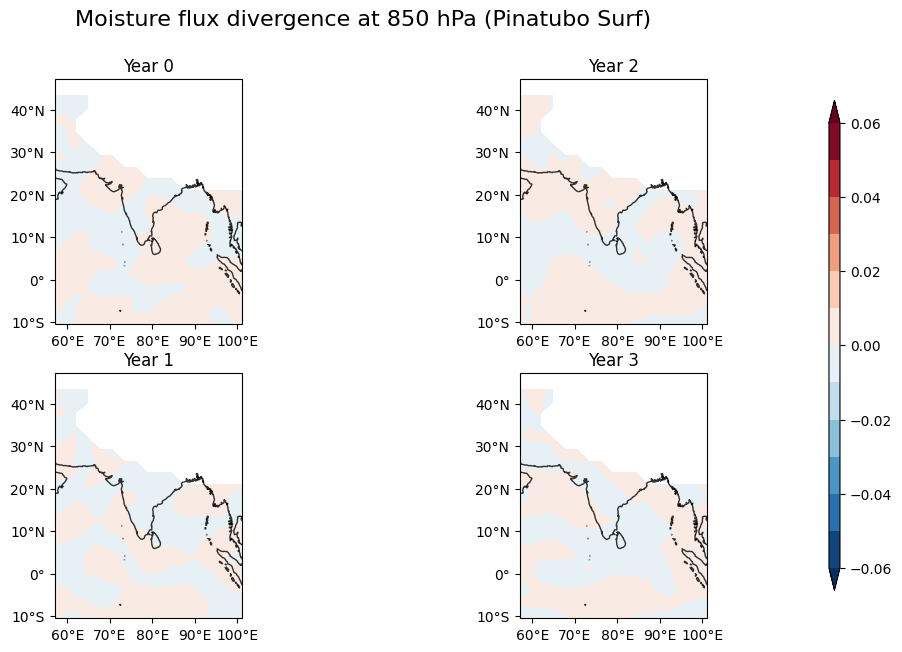

In [ ]:
 u_wind_ranges = [ds_ua_surf_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_surf_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_surf_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_surf_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_surf_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_surf_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_surf_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_surf_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(11, 7))
huswind_ranges = [ds_hus_surf_anom.sel(plev=85000).isel(time=slice(0,12)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_surf_anom.sel(plev=85000).isel(time=slice(13,24)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_surf_anom.sel(plev=85000).isel(time=slice(25,36)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_surf_anom.sel(plev=85000).isel(time=slice(37,48)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values]
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()

clevs = [-0.06,-0.05,-0.04,-0.03,-0.02,-0.01, 0,0.01,0.02,0.03,0.04,0.05,0.06]


cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_mdf(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], huswind_ranges[cnt])
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    vp_fill = plot_mdf(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], huswind_ranges[cnt])
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1

cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar.set_alpha(0.8)
plt.colorbar(vp_fill, cax = cbar1, orientation='vertical')
plt.suptitle('Moisture flux divergence at 850 hPa (Pinatubo Surf) ', fontsize=16)
plt.show()


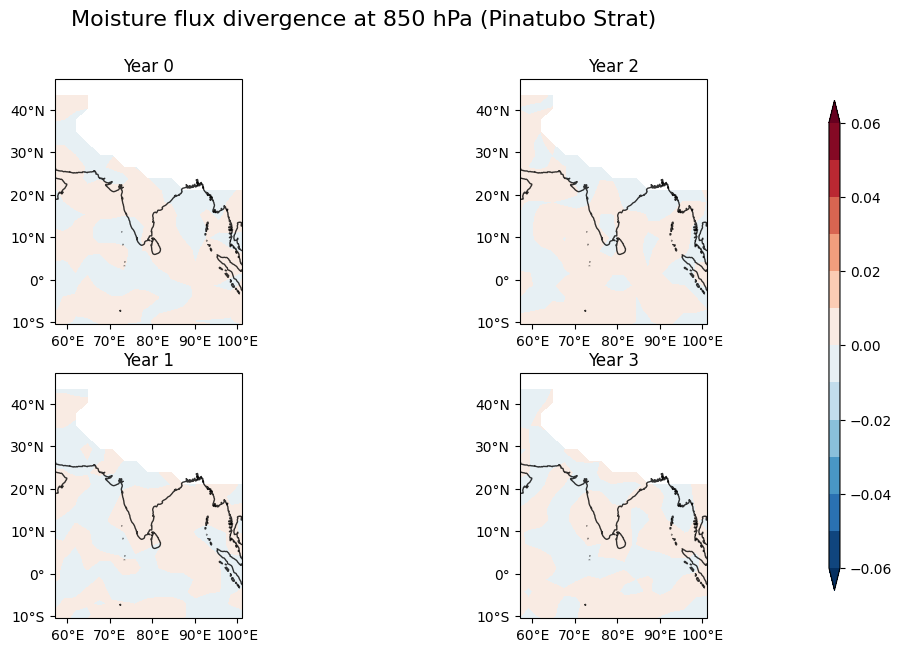

In [ ]:
 u_wind_ranges = [ds_ua_strat_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_strat_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_strat_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_ua_strat_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

v_wind_ranges = [ds_va_strat_anom.sel(plev=85000).isel(time=slice(0, 12)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_strat_anom.sel(plev=85000).isel(time=slice(13, 24)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_strat_anom.sel(plev=85000).isel(time=slice(25, 36)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values,
                  ds_va_strat_anom.sel(plev=85000).isel(time=slice(37, 48)).mean(dim='time').sel(lat=slice(-15, 45)).sel(lon=slice(40, 120)).values]

fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': projection}, figsize=(11, 7))
huswind_ranges = [ds_hus_strat_anom.sel(plev=85000).isel(time=slice(0,12)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_strat_anom.sel(plev=85000).isel(time=slice(13,24)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_strat_anom.sel(plev=85000).isel(time=slice(25,36)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values,
                  ds_hus_strat_anom.sel(plev=85000).isel(time=slice(37,48)).mean(dim = 'time').sel(lat=slice(-15,45)).sel(lon=slice(40,120)).values]
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()

cnt=0
for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,0]
    plot_mdf(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], huswind_ranges[cnt])
    ax_.set_title(title1[i_cnt])
    cnt = cnt+1

for i_cnt,ax_ in enumerate(ax):
    ax_ = ax[i_cnt,1]
    vp_fill = plot_mdf(ax_, u_wind_ranges[cnt], v_wind_ranges[cnt], huswind_ranges[cnt])
    ax_.set_title(title2[i_cnt])
    cnt = cnt+1

cbar1 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar.set_alpha(0.8)

plt.colorbar(vp_fill, cax = cbar1, orientation='vertical')
plt.suptitle('Moisture flux divergence at 850 hPa (Pinatubo Strat) ', fontsize=16)
plt.show()


In [ ]:
Core = ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core1 = ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core2 = ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core3 = ds_ua_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core4 = ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core5 = ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core6 = ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core7 = ds_va_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Mag = (Core**2 + Core4**2)**0.5
Mag1= (Core1**2 + Core5**2)**0.5
Mag2= (Core2**2 + Core6**2)**0.5
Mag3= (Core3**2 + Core7**2)**0.5

Corea = ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(0, 12)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core1a = ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(13, 24)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core2a = ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(25, 36)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core3a = ds_ua_pinatubo_anom.sel(plev=20000).isel(time=slice(37, 48)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core4a = ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(0, 12)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core5a = ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(13, 24)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core6a = ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(25, 36)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core7a = ds_va_pinatubo_anom.sel(plev=20000).isel(time=slice(37, 48)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Maga = (Core**2 + Core4**2)**0.5
Mag1a= (Core1**2 + Core5**2)**0.5
Mag2a= (Core2**2 + Core6**2)**0.5
Mag3a= (Core3**2 + Core7**2)**0.5

Coreh = ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(0, 12)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core1h = ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(13, 24)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core2h = ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(25, 36)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values
Core3h = ds_hus_pinatubo_anom.sel(plev=85000).isel(time=slice(37, 48)).sel(lat=slice(14, 28)).sel(lon=slice(73, 87)).mean(dim=['time','lat','lon']).values


lats = ds_ua_pinatubo_anom.lat.sel(lat=slice(14, 28)).values
lons = ds_va_pinatubo_anom.lon.sel(lon=slice(73, 87)).values

uq = Coreh*Core
vq = Coreh*Core4
uq1 = Core1h*Core1
vq1 = Core1h*Core5
uq2 = Core2h*Core2
vq2 = Core2h*Core6
uq3 = Core3h*Core3
vq3 = Core3h*Core7

dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)
HMC = (np.array(mpcalc.divergence(uq, vq, dx=dx, dy=dy)))
HMC1 = (np.array(mpcalc.divergence(uq1, vq1, dx=dx, dy=dy)))
HMC2 = (np.array(mpcalc.divergence(uq2, vq2, dx=dx, dy=dy)))
HMC3 = (np.array(mpcalc.divergence(uq3, vq3, dx=dx, dy=dy)))


AxisError: axis -1 is out of bounds for array of dimension 0

In [ ]:
data = [['Year 0', Mag, Maga, HMC],
        ['Year 1', Mag1, Mag1a, HMC1],
        ['Year 2', Mag2, Mag2a, HMC2],
        ['Year 3', Mag3, Mag3a, HMC3]]
table = tabulate(data, headers=["Year","Speed at 850 hPa","Speed at 200 hPa","Moisture Flux Divergence at 850 hPa"], tablefmt='grid')
white_background_table = '\x1b[47m' + table + '\x1b[0m'
table1 = '\x1b[30m' + white_background_table + '\x1b[0m'
print("Wind Speed and Moisture Flux Divergence for Indian Core Monsoon Region - Pinatubo Full")
print(table1)